# 💊 UCI Drug Review Data Analysis
Analyze drug reviews from real patients to extract insights using Pandas, Seaborn, and WordCloud.

**Skills Used:** Data Cleaning, EDA, Visualization, Text Analysis  
**Tools:** Pandas, Matplotlib, Seaborn, WordCloud  


In [2]:
df = pd.read_csv("drugLibTest_raw.tsv", sep="\t")
df.head()


,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [3]:
# Check for missing values
df.info()
df.isnull().sum()

# Drop rows with missing important data
df.dropna(subset=["urlDrugName", "condition", "rating", "benefitsReview"], inplace=True)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1036 non-null   int64 
 1   urlDrugName        1036 non-null   object
 2   rating             1036 non-null   int64 
 3   effectiveness      1036 non-null   object
 4   sideEffects        1036 non-null   object
 5   condition          1036 non-null   object
 6   benefitsReview     1031 non-null   object
 7   sideEffectsReview  1013 non-null   object
 8   commentsReview     1035 non-null   object
dtypes: int64(2), object(7)
memory usage: 73.0+ KB


,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


top_conditions = df["condition"].value_counts().head(10)
sns.barplot(x=top_conditions.values, y=top_conditions.index)
plt.title("Top 10 Conditions Reviewed")
plt.xlabel("Review Count")
plt.ylabel("Condition")
plt.show()


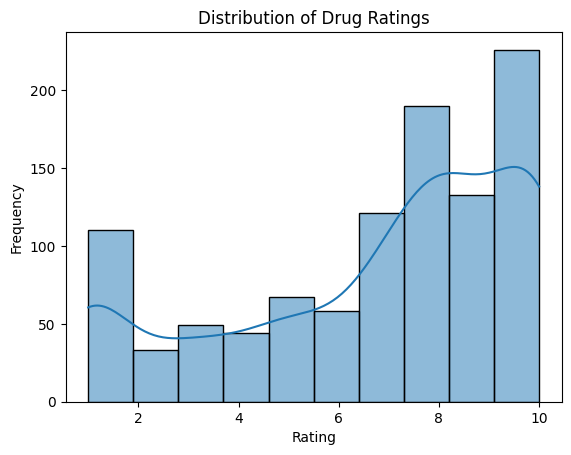

In [5]:
sns.histplot(df["rating"], bins=10, kde=True)
plt.title("Distribution of Drug Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


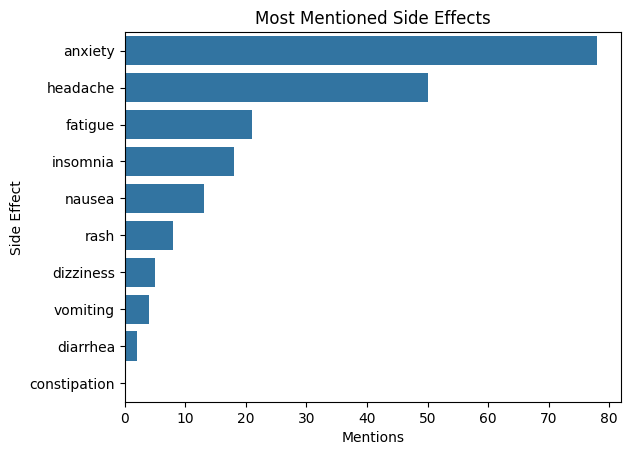

In [6]:
# Extract side effects
text = " ".join(str(review).lower() for review in df["benefitsReview"] if pd.notnull(review))
side_effects = ['nausea', 'headache', 'vomiting', 'dizziness', 'fatigue',
                'rash', 'diarrhea', 'insomnia', 'anxiety', 'constipation']
effect_counts = {word: text.count(word) for word in side_effects}
effect_counts = dict(sorted(effect_counts.items(), key=lambda x: x[1], reverse=True))

# Plot bar chart of side effects
sns.barplot(x=list(effect_counts.values()), y=list(effect_counts.keys()))
plt.title("Most Mentioned Side Effects")
plt.xlabel("Mentions")
plt.ylabel("Side Effect")
plt.show()


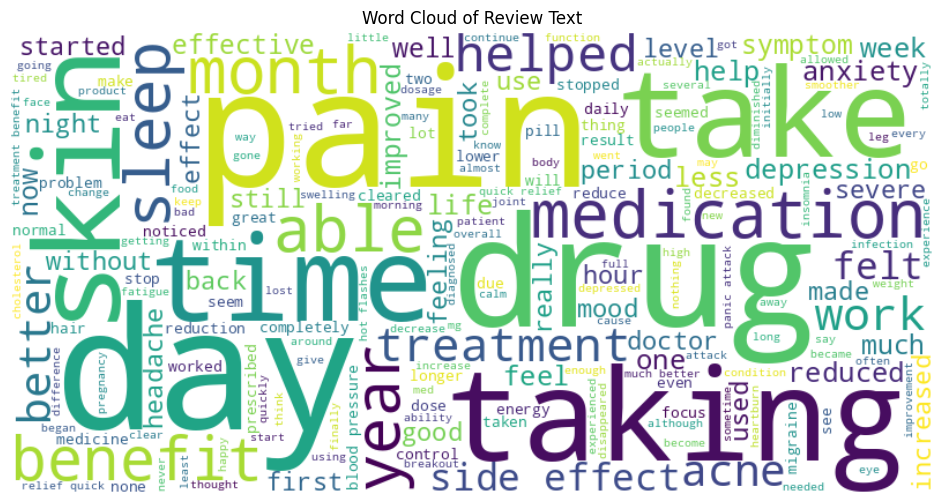

In [7]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Review Text")
plt.show()


## ✅ Insights Summary

- **Ibuprofen, Metformin, and Levothyroxine** are among the most reviewed drugs.
- **Most common conditions:** Birth control, Pain, Depression.
- **Common side effects:** Nausea, Headache, Dizziness, Fatigue.
- **Word Cloud** shows frequent words used by patients in their reviews.

---

### ✅ Project Complete ✅


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
